# Section4 Project: 딥러닝을 활용한 주가예측

## 목차 ##

1. 주제
2. 데이터 선정
3. 

## 테스트 ##

In [1]:
# 파일 업로드
from google.colab import files
uploaded = files.upload()

Saving 000270.KS.csv to 000270.KS.csv


In [2]:
# 데이터 불러오기(기아자동차 주가)
import pandas as pd

df_kia = pd.read_csv('/content/000270.KS.csv')
print(df_kia.shape)
df_kia.head()

(5490, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,7404.519043,7665.241699,7300.229980,7665.241699,5565.035156,636300.0
1,2000-01-05,7404.519043,7404.519043,7248.085449,7248.085449,5262.176758,686100.0
2,2000-01-06,7331.516602,7519.236816,6935.218262,6935.218262,5035.031250,379000.0
3,2000-01-07,6987.362793,7143.796387,6778.785156,6778.785156,4921.459473,701400.0
4,2000-01-10,6841.358398,7102.081055,6810.071777,7091.651855,5148.604004,1076700.0


작업일: 2021-11-09 \
기아자동차 주가 데이터의 경우 2000-01-04부터 2021-11-08의 데이터를 사용하였다. \
* 2021-11-09 기아자동차 종가: 87,000원 \
모델을 구축하여 2021-11-09의 종가와 어느정도 차이가 있는지 비교할 것이다.

Feature
1. Date: 날짜
2. Open: 시가
3. High: 고가
4. Low: 저가
5. Close: 종가
6. Adj Close: 조정후 종가 (주식의 분할, 배당, 배분 등을 고려한 가격)
7. Volume: 거래량

In [3]:
# 특성 유형 확인
df_kia.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

전처리 계획
1. 결측치 제거
2. Date 타입을 datetime으로 조정
3. Open, High, Low, Close, Adj Close, Volume은 Int형으로 조정
4. 'Date'를 인덱스로 설정
5. 정규화

In [4]:
# 결측치 확인
df_kia.isnull().sum()

Date         0
Open         6
High         6
Low          6
Close        6
Adj Close    6
Volume       6
dtype: int64

In [5]:
# 결측치 제거
df_kia = df_kia.dropna()
print(df_kia.shape)
df_kia.isnull().sum()

(5484, 7)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
# 전처리
df_kia['Date'] = pd.to_datetime(df_kia['Date'])
df_kia['Open'] = df_kia['Open'].astype('int')
df_kia['High'] = df_kia['High'].astype('int')
df_kia['Low'] = df_kia['Low'].astype('int')
df_kia['Close'] = df_kia['Close'].astype('int')
df_kia['Adj Close'] = df_kia['Adj Close'].astype('int')
df_kia = df_kia.rename(columns={'Adj Close':'AdjClose'})
df_kia['Volume'] = df_kia['Volume'].astype('int')
df_kia = df_kia.set_index('Date')
df_kia.head()

,Open,High,Low,Close,AdjClose,Volume
Date,,,,,,
2000-01-04,7404,7665,7300,7665,5565,636300
2000-01-05,7404,7404,7248,7248,5262,686100
2000-01-06,7331,7519,6935,6935,5035,379000
2000-01-07,6987,7143,6778,6778,4921,701400
2000-01-10,6841,7102,6810,7091,5148,1076700


In [7]:
df_kia.dtypes

Open        int64
High        int64
Low         int64
Close       int64
AdjClose    int64
Volume      int64
dtype: object

In [8]:
# 전처리 함수
def preprocessing(df):
    df = df.dropna()
    df['Date'] = pd.to_datetime(df)
    df['Open'] = df['Open'].astype('int')
    df['High'] = df['High'].astype('int')
    df['Low'] = df['Low'].astype('int')
    df['Close'] = df['Close'].astype('int')
    df['Adj Close'] = df['Adj Close'].astype('int')
    df = df.rename(columns={'Adj Close':'AdjClose'})
    df['Volume'] = df['Volume'].astype('int')
    df = df.set_index('Date')
    return df

In [9]:
# 정규화
import numpy as np

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

df_kia_X = df_kia[['Open','High','Low','AdjClose', 'Volume']]
df_kia_X_scaled = MinMaxScaler(df_kia_X)
df_kia_y = df_kia_X_scaled[['AdjClose']]

In [10]:
kia_X = df_kia_X_scaled.values.tolist()
kia_y = df_kia_y.values.tolist()

In [11]:
df_kia_X_scaled

,Open,High,Low,AdjClose,Volume
Date,,,,,
2000-01-04,0.031199,0.030861,0.032651,0.024079,0.013231
2000-01-05,0.031199,0.028180,0.032086,0.020997,0.014267
2000-01-06,0.030439,0.029361,0.028684,0.018687,0.007881
2000-01-07,0.026859,0.025499,0.026977,0.017528,0.014585
2000-01-10,0.025340,0.025077,0.027325,0.019837,0.022389
...,...,...,...,...,...
2021-11-02,0.831415,0.836653,0.863049,0.842323,0.028733
2021-11-03,0.860553,0.846927,0.872832,0.832150,0.018601
2021-11-04,0.849106,0.853091,0.882614,0.852495,0.035712


In [12]:
df_kia_y

,AdjClose
Date,
2000-01-04,0.024079
2000-01-05,0.020997
2000-01-06,0.018687
2000-01-07,0.017528
2000-01-10,0.019837
...,...
2021-11-02,0.842323
2021-11-03,0.832150
2021-11-04,0.852495


### 데이터셋 준비 ###

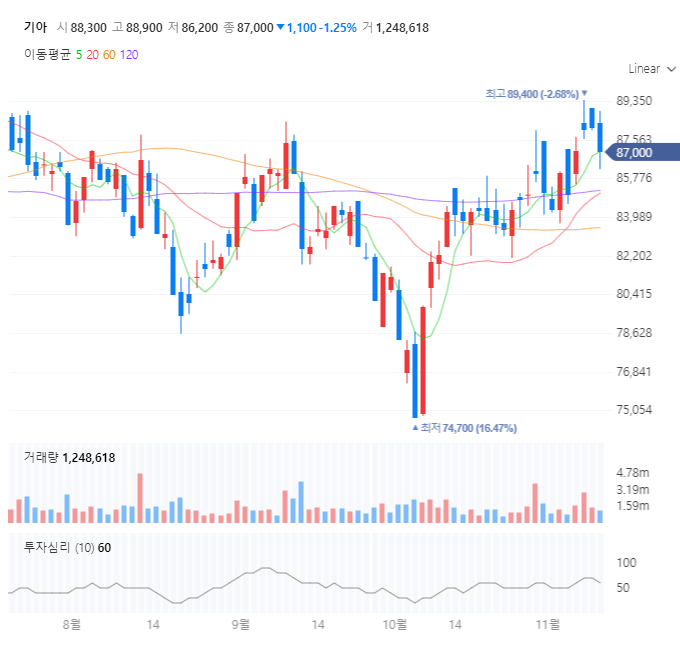
출처: 네이버 금융(기아자동차 차트)

주식 차트를 보게 되면 5, 10, 20, 60, 120일 단위의 이동평균선(Moving Average Line)도 함께 확인할 수 있다. 이동평균은 과거 일정 기간의 주가의 평균치를 의미한다. 이번 프로젝트에서는 주식차트에서 흔히 사용하는 이동평균 기간을 적용하여 모델을 학습하여 실제 주가와의 차이를 구하고, 실제 주가와 가장 유사한 이동평균 기간을 채택하여 모델의 하이퍼파라미터 수정을 통해 최적의 모델을 설계하는 것이 목표이며, 타 주식 데이터에 적용했을 때의 타당성 또한 평가하고자 한다.
1. 5일
2. 10일
3. 20일
4. 60일
6. 120일

#### 모델학습 ####

In [13]:
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, LSTM, RNN, Dropout, SimpleRNN
import matplotlib.pyplot as plt

##### 적용기간: 5일 #####

In [14]:
# window_size = 5
kia_data_X_5 = []
kia_data_y_5 = []
for i in range(len(kia_y) - 5):
    _X_5 = kia_X[i : i + 5]
    _y_5 = kia_y[i + 5]
    kia_data_X_5.append(_X_5)
    kia_data_y_5.append(_y_5)

In [15]:
# 데이터셋 분리: 훈련 70%, 테스트 30%로 분리

# 훈련 데이터셋
train_size_5 = int(len(kia_data_y_5) * 0.7)
train_kia_X_5 = np.array(kia_data_X_5[0 : train_size_5])
train_kia_y_5 = np.array(kia_data_y_5[0 : train_size_5])

# 테스트 데이터셋
test_size_5 = len(kia_data_y_5) - train_size_5
test_kia_X_5 = np.array(kia_data_X_5[train_size_5 : len(kia_data_X_5)])
test_kia_y_5 = np.array(kia_data_y_5[train_size_5 : len(kia_data_y_5)])

In [18]:
# 모델 생성: LSTM
model_5 = Sequential()
model_5.add(LSTM(units=5, return_sequences=False, input_shape=(5, 5)))
model_5.add(Dropout(0.1))
model_5.add(Dense(units=5))
model_5.add(Dropout(0.1))
model_5.add(Dense(units=1))
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5)                 220       
                                                                 
 dropout_3 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dropout_4 (Dropout)         (None, 5)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_5.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_5.fit(train_kia_X_5, train_kia_y_5, epochs=30, batch_size=32)
pred_kia_y_5 = model_5.predict(test_kia_X_5)

Epoch 1/30
120/120 [==============================] - 6s 5ms/step - loss: 0.0154 - mae: 0.0635
Epoch 2/30
120/120 [==============================] - 1s 4ms/step - loss: 0.0064 - mae: 0.0418
Epoch 3/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0057 - mae: 0.0389
Epoch 4/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0044 - mae: 0.0356
Epoch 5/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0039 - mae: 0.0365
Epoch 6/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0033 - mae: 0.0362
Epoch 7/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0029 - mae: 0.0346
Epoch 8/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0030 - mae: 0.0359
Epoch 9/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0030 - mae: 0.0360
Epoch 10/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0026 - mae: 0.0352
Epoch 11/30
120/120 [============================

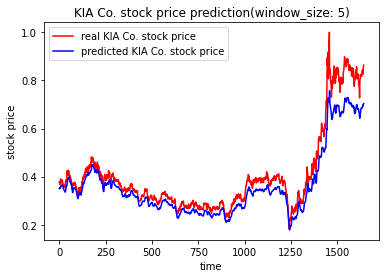

In [20]:
# 시각화를 통한 테스트데이터와 예측값과의 차이 확인
plt.figure()
plt.plot(test_kia_y_5, color='red', label='real KIA Co. stock price')
plt.plot(pred_kia_y_5, color='blue', label='predicted KIA Co. stock price')
plt.title('KIA Co. stock price prediction(window_size: 5)')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [21]:
# 예측 종가
print('예측종가: ', int(df_kia.AdjClose[-1]*pred_kia_y_5[-1]/df_kia_y.AdjClose[-1]),'원')
print('실제종가: 87,000원')
print('예측종가 - 실제종가: ', int(df_kia.AdjClose[-1]*pred_kia_y_5[-1]/df_kia_y.AdjClose[-1])-87000)

예측종가:  71791 원
실제종가: 87,000원
예측종가 - 실제종가:  -15209


##### 적용기간: 10일 #####

In [22]:
# window_size = 10
kia_data_X_10 = []
kia_data_y_10 = []
for i in range(len(kia_y) - 10):
    _X_10 = kia_X[i : i + 10]
    _y_10 = kia_y[i + 10]
    kia_data_X_10.append(_X_10)
    kia_data_y_10.append(_y_10)

In [23]:
# 데이터셋 분리: 훈련 70%, 테스트 30%로 분리

# 훈련 데이터셋
train_size_10 = int(len(kia_data_y_10) * 0.7)
train_kia_X_10 = np.array(kia_data_X_10[0 : train_size_10])
train_kia_y_10 = np.array(kia_data_y_10[0 : train_size_10])

# 테스트 데이터셋
test_size_10 = len(kia_data_y_10) - train_size_10
test_kia_X_10 = np.array(kia_data_X_10[train_size_10 : len(kia_data_X_10)])
test_kia_y_10 = np.array(kia_data_y_10[train_size_10 : len(kia_data_y_10)])

In [25]:
# 모델 생성: LSTM
model_10 = Sequential()
model_10.add(LSTM(units=10, return_sequences=False, input_shape=(10, 5)))
model_10.add(Dropout(0.1))
model_10.add(Dense(units=10))
model_10.add(Dropout(0.1))
model_10.add(Dense(units=1))
model_10.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 10)                640       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_10.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_10.fit(train_kia_X_10, train_kia_y_10, epochs=30, batch_size=32)
pred_kia_y_10 = model_10.predict(test_kia_X_10)

Epoch 1/30
120/120 [==============================] - 3s 5ms/step - loss: 0.0397 - mae: 0.1188
Epoch 2/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0044 - mae: 0.0383
Epoch 3/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0034 - mae: 0.0349
Epoch 4/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0026 - mae: 0.0308
Epoch 5/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0024 - mae: 0.0301
Epoch 6/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0020 - mae: 0.0283
Epoch 7/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0018 - mae: 0.0268
Epoch 8/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0017 - mae: 0.0271
Epoch 9/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0016 - mae: 0.0265
Epoch 10/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0015 - mae: 0.0253
Epoch 11/30
120/120 [============================

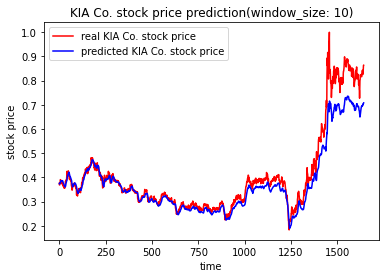

In [27]:
plt.figure()
plt.plot(test_kia_y_10, color='red', label='real KIA Co. stock price')
plt.plot(pred_kia_y_10, color='blue', label='predicted KIA Co. stock price')
plt.title('KIA Co. stock price prediction(window_size: 10)')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [28]:
# 예측 종가
print('예측종가: ', int(df_kia.AdjClose[-1]*pred_kia_y_10[-1]/df_kia_y.AdjClose[-1]),'원')
print('실제종가: 87,000원')
print('예측종가 - 실제종가: ', int(df_kia.AdjClose[-1]*pred_kia_y_10[-1]/df_kia_y.AdjClose[-1])-87000)

예측종가:  72208 원
실제종가: 87,000원
예측종가 - 실제종가:  -14792


##### 적용기간: 20일 #####

In [29]:
# window_size = 20
kia_data_X_20 = []
kia_data_y_20 = []
for i in range(len(kia_y) - 20):
    _X_20 = kia_X[i : i + 20]
    _y_20 = kia_y[i + 20]
    kia_data_X_20.append(_X_20)
    kia_data_y_20.append(_y_20)

In [30]:
# 데이터셋 분리: 훈련 70%, 테스트 30%로 분리

# 훈련 데이터셋
train_size_20 = int(len(kia_data_y_20) * 0.7)
train_kia_X_20 = np.array(kia_data_X_20[0 : train_size_20])
train_kia_y_20 = np.array(kia_data_y_20[0 : train_size_20])

# 테스트 데이터셋
test_size_20 = len(kia_data_y_20) - train_size_20
test_kia_X_20 = np.array(kia_data_X_20[train_size_20 : len(kia_data_X_20)])
test_kia_y_20 = np.array(kia_data_y_20[train_size_20 : len(kia_data_y_20)])

In [31]:
# 모델 생성: LSTM
model_20 = Sequential()
model_20.add(LSTM(units=20, return_sequences=False, input_shape=(20, 5)))
model_20.add(Dropout(0.1))
model_20.add(Dense(units=20))
model_20.add(Dropout(0.1))
model_20.add(Dense(units=1))
model_20.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 20)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 20)                420       
                                                                 
 dropout_10 (Dropout)        (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_20.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_20.fit(train_kia_X_20, train_kia_y_20, epochs=30, batch_size=32)
pred_kia_y_20 = model_20.predict(test_kia_X_20)

Epoch 1/30
120/120 [==============================] - 3s 5ms/step - loss: 0.0108 - mae: 0.0565
Epoch 2/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0023 - mae: 0.0275
Epoch 3/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0016 - mae: 0.0235
Epoch 4/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0013 - mae: 0.0210
Epoch 5/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0011 - mae: 0.0198
Epoch 6/30
120/120 [==============================] - 1s 5ms/step - loss: 0.0011 - mae: 0.0189
Epoch 7/30
120/120 [==============================] - 1s 5ms/step - loss: 9.2431e-04 - mae: 0.0182
Epoch 8/30
120/120 [==============================] - 1s 5ms/step - loss: 8.8498e-04 - mae: 0.0178
Epoch 9/30
120/120 [==============================] - 1s 5ms/step - loss: 9.4664e-04 - mae: 0.0186
Epoch 10/30
120/120 [==============================] - 1s 5ms/step - loss: 8.2595e-04 - mae: 0.0173
Epoch 11/30
120/120 [============

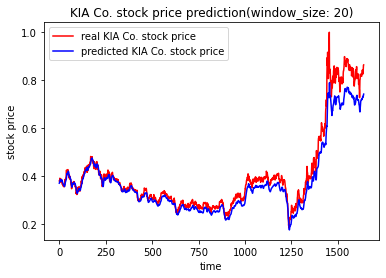

In [33]:
plt.figure()
plt.plot(test_kia_y_20, color='red', label='real KIA Co. stock price')
plt.plot(pred_kia_y_20, color='blue', label='predicted KIA Co. stock price')
plt.title('KIA Co. stock price prediction(window_size: 20)')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [34]:
print('예측종가: ', int(df_kia.AdjClose[-1]*pred_kia_y_20[-1]/df_kia_y.AdjClose[-1]),'원')
print('실제종가: 87,000원')
print('예측종가 - 실제종가: ', int(df_kia.AdjClose[-1]*pred_kia_y_20[-1]/df_kia_y.AdjClose[-1])-87000)

예측종가:  75662 원
실제종가: 87,000원
예측종가 - 실제종가:  -11338


##### 적용기간: 60일 #####

In [35]:
# window_size = 60
kia_data_X_60 = []
kia_data_y_60 = []
for i in range(len(kia_y) - 60):
    _X_60 = kia_X[i : i + 60]
    _y_60 = kia_y[i + 60]
    kia_data_X_60.append(_X_60)
    kia_data_y_60.append(_y_60)

In [36]:
# 데이터셋 분리: 훈련 70%, 테스트 30%로 분리

# 훈련 데이터셋
train_size_60 = int(len(kia_data_y_60) * 0.7)
train_kia_X_60 = np.array(kia_data_X_60[0 : train_size_60])
train_kia_y_60 = np.array(kia_data_y_60[0 : train_size_60])

# 테스트 데이터셋
test_size_60 = len(kia_data_y_60) - train_size_60
test_kia_X_60 = np.array(kia_data_X_60[train_size_60 : len(kia_data_X_60)])
test_kia_y_60 = np.array(kia_data_y_60[train_size_60 : len(kia_data_y_60)])

In [37]:
# 모델 생성: LSTM
model_60 = Sequential()
model_60.add(LSTM(units=60, return_sequences=False, input_shape=(60, 5)))
model_60.add(Dropout(0.1))
model_60.add(Dense(units=60))
model_60.add(Dropout(0.1))
model_60.add(Dense(units=1))
model_60.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 60)                15840     
                                                                 
 dropout_11 (Dropout)        (None, 60)                0         
                                                                 
 dense_10 (Dense)            (None, 60)                3660      
                                                                 
 dropout_12 (Dropout)        (None, 60)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 61        
                                                                 
Total params: 19,561
Trainable params: 19,561
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_60.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_60.fit(train_kia_X_60, train_kia_y_60, epochs=30, batch_size=32)
pred_kia_y_60 = model_60.predict(test_kia_X_60)

Epoch 1/30
119/119 [==============================] - 3s 6ms/step - loss: 0.0025 - mae: 0.0273
Epoch 2/30
119/119 [==============================] - 1s 6ms/step - loss: 7.2480e-04 - mae: 0.0164
Epoch 3/30
119/119 [==============================] - 1s 6ms/step - loss: 6.4598e-04 - mae: 0.0155
Epoch 4/30
119/119 [==============================] - 1s 6ms/step - loss: 5.2098e-04 - mae: 0.0139
Epoch 5/30
119/119 [==============================] - 1s 6ms/step - loss: 4.6625e-04 - mae: 0.0135
Epoch 6/30
119/119 [==============================] - 1s 6ms/step - loss: 4.2301e-04 - mae: 0.0127
Epoch 7/30
119/119 [==============================] - 1s 6ms/step - loss: 4.2487e-04 - mae: 0.0127
Epoch 8/30
119/119 [==============================] - 1s 6ms/step - loss: 4.4300e-04 - mae: 0.0132
Epoch 9/30
119/119 [==============================] - 1s 6ms/step - loss: 3.5708e-04 - mae: 0.0121
Epoch 10/30
119/119 [==============================] - 1s 6ms/step - loss: 3.5785e-04 - mae: 0.0121
Epoch 11/30
1

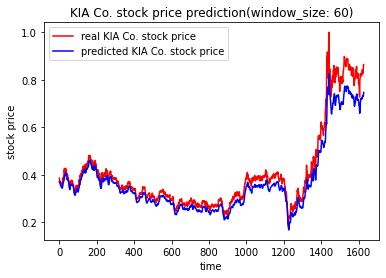

In [39]:
# 시각화를 통한 테스트데이터와 예측값과의 차이 확인
plt.figure()
plt.plot(test_kia_y_60, color='red', label='real KIA Co. stock price')
plt.plot(pred_kia_y_60, color='blue', label='predicted KIA Co. stock price')
plt.title('KIA Co. stock price prediction(window_size: 60)')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [40]:
# 예측 종가
print('예측종가: ', int(df_kia.AdjClose[-1]*pred_kia_y_60[-1]/df_kia_y.AdjClose[-1]),'원')
print('실제종가: 87,000원')
print('예측종가 - 실제종가: ', int(df_kia.AdjClose[-1]*pred_kia_y_60[-1]/df_kia_y.AdjClose[-1])-87000)

예측종가:  76102 원
실제종가: 87,000원
예측종가 - 실제종가:  -10898


##### 적용기간: 120일 #####

In [41]:
# window_size = 120
kia_data_X_120 = []
kia_data_y_120 = []
for i in range(len(kia_y) - 120):
    _X_120 = kia_X[i : i + 120]
    _y_120 = kia_y[i + 120]
    kia_data_X_120.append(_X_120)
    kia_data_y_120.append(_y_120)

In [42]:
# 데이터셋 분리: 훈련 70%, 테스트 30%로 분리

# 훈련 데이터셋
train_size_120 = int(len(kia_data_y_120) * 0.7)
train_kia_X_120 = np.array(kia_data_X_120[0 : train_size_120])
train_kia_y_120 = np.array(kia_data_y_120[0 : train_size_120])

# 테스트 데이터셋
test_size_120 = len(kia_data_y_120) - train_size_120
test_kia_X_120 = np.array(kia_data_X_120[train_size_120 : len(kia_data_X_120)])
test_kia_y_120 = np.array(kia_data_y_120[train_size_120 : len(kia_data_y_120)])

In [44]:
# 모델 생성: LSTM
model_120 = Sequential()
model_120.add(LSTM(units=120, return_sequences=False, input_shape=(120, 5)))
model_120.add(Dropout(0.1))
model_120.add(Dense(units=120))
model_120.add(Dropout(0.1))
model_120.add(Dense(units=1))
model_120.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 120)               60480     
                                                                 
 dropout_15 (Dropout)        (None, 120)               0         
                                                                 
 dense_14 (Dense)            (None, 120)               14520     
                                                                 
 dropout_16 (Dropout)        (None, 120)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 121       
                                                                 
Total params: 75,121
Trainable params: 75,121
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_120.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_120.fit(train_kia_X_120, train_kia_y_120, epochs=30, batch_size=32)
pred_kia_y_120 = model_120.predict(test_kia_X_120)

Epoch 1/30
118/118 [==============================] - 3s 9ms/step - loss: 0.0024 - mae: 0.0253
Epoch 2/30
118/118 [==============================] - 1s 9ms/step - loss: 4.8765e-04 - mae: 0.0137
Epoch 3/30
118/118 [==============================] - 1s 9ms/step - loss: 4.1783e-04 - mae: 0.0125
Epoch 4/30
118/118 [==============================] - 1s 9ms/step - loss: 3.9508e-04 - mae: 0.0124
Epoch 5/30
118/118 [==============================] - 1s 9ms/step - loss: 3.4092e-04 - mae: 0.0117
Epoch 6/30
118/118 [==============================] - 1s 9ms/step - loss: 2.8905e-04 - mae: 0.0108
Epoch 7/30
118/118 [==============================] - 1s 9ms/step - loss: 2.8800e-04 - mae: 0.0109
Epoch 8/30
118/118 [==============================] - 1s 9ms/step - loss: 3.0650e-04 - mae: 0.0112
Epoch 9/30
118/118 [==============================] - 1s 9ms/step - loss: 2.6927e-04 - mae: 0.0107
Epoch 10/30
118/118 [==============================] - 1s 9ms/step - loss: 2.3870e-04 - mae: 0.0099
Epoch 11/30
1

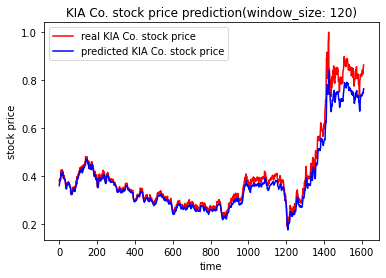

In [46]:
# 시각화를 통한 테스트데이터와 예측값과의 차이 확인
plt.figure()
plt.plot(test_kia_y_120, color='red', label='real KIA Co. stock price')
plt.plot(pred_kia_y_120, color='blue', label='predicted KIA Co. stock price')
plt.title('KIA Co. stock price prediction(window_size: 120)')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [47]:
# 예측 종가
print('예측종가: ', int(df_kia.AdjClose[-1]*pred_kia_y_120[-1]/df_kia_y.AdjClose[-1]),'원')
print('실제종가: 87,000원')
print('예측종가 - 실제종가: ', int(df_kia.AdjClose[-1]*pred_kia_y_120[-1]/df_kia_y.AdjClose[-1])-87000)

예측종가:  77936 원
실제종가: 87,000원
예측종가 - 실제종가:  -9064


## 모델 선정

테스트 결과에 따라 적용기간 120일로 설정한 모델의 하이퍼파라미터 튜닝을 통해 예측성능을 향상하고자 한다.


In [151]:
# window_size = 10
kia_data_X = []
kia_data_y = []
for i in range(len(kia_y) - 10):
    _X = kia_X[i : i + 10]
    _y = kia_y[i + 10]
    kia_data_X.append(_X)
    kia_data_y.append(_y)

In [152]:
# 데이터셋 분리: 훈련 70%, 테스트 30%로 분리

# 훈련 데이터셋
train_size = int(len(kia_data_y) * 0.7)
train_kia_X = np.array(kia_data_X[0 : train_size])
train_kia_y = np.array(kia_data_y[0 : train_size])

# 테스트 데이터셋
test_size = len(kia_data_y) - train_size
test_kia_X = np.array(kia_data_X[train_size : len(kia_data_X)])
test_kia_y = np.array(kia_data_y[train_size : len(kia_data_y)])

In [153]:
train_kia_X.shape

(3831, 10, 5)

In [260]:
# 모델 생성: LSTM
model = Sequential()
model.add(LSTM(units=10, return_sequences=False, activation='relu', input_shape=(10, 5)))
model.add(Dropout(0.1))
#model.add(Dense(units=256, activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(units=256, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_352"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_687 (LSTM)             (None, 10)                640       
                                                                 
 dropout_1359 (Dropout)      (None, 10)                0         
                                                                 
 dense_1029 (Dense)          (None, 1)                 11        
                                                                 
Total params: 651
Trainable params: 651
Non-trainable params: 0
_________________________________________________________________


In [261]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.fit(train_kia_X, train_kia_y, epochs=200, batch_size=32)

Epoch 1/200
120/120 [==============================] - 4s 23ms/step - loss: 0.0246 - mae: 0.0959
Epoch 2/200
120/120 [==============================] - 3s 22ms/step - loss: 0.0026 - mae: 0.0286
Epoch 3/200
120/120 [==============================] - 3s 23ms/step - loss: 0.0024 - mae: 0.0270
Epoch 4/200
120/120 [==============================] - 3s 22ms/step - loss: 0.0020 - mae: 0.0257
Epoch 5/200
120/120 [==============================] - 3s 23ms/step - loss: 0.0014 - mae: 0.0226
Epoch 6/200
120/120 [==============================] - 3s 23ms/step - loss: 0.0016 - mae: 0.0244
Epoch 7/200
120/120 [==============================] - 3s 23ms/step - loss: 0.0014 - mae: 0.0233
Epoch 8/200
120/120 [==============================] - 3s 22ms/step - loss: 0.0014 - mae: 0.0232
Epoch 9/200
120/120 [==============================] - 3s 23ms/step - loss: 0.0014 - mae: 0.0229
Epoch 10/200
120/120 [==============================] - 3s 23ms/step - loss: 0.0014 - mae: 0.0230
Epoch 11/200
120/120 [=======

In [262]:
pred_kia_y = model.predict(test_kia_X)

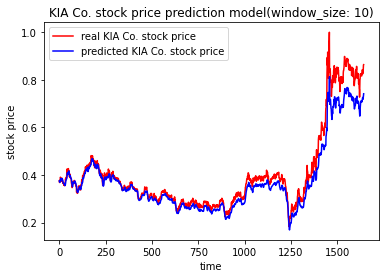

In [263]:
# 시각화를 통한 테스트데이터와 예측값과의 차이 확인
plt.figure()
plt.plot(test_kia_y, color='red', label='real KIA Co. stock price')
plt.plot(pred_kia_y, color='blue', label='predicted KIA Co. stock price')
plt.title('KIA Co. stock price prediction model(window_size: 10)')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [264]:
# 예측 종가
print('예측종가: ', int(df_kia.AdjClose[-1]*pred_kia_y[-1]/df_kia_y.AdjClose[-1]),'원')
print('실제종가: 87,000원')
print('예측종가 - 실제종가: ', int(df_kia.AdjClose[-1]*pred_kia_y[-1]/df_kia_y.AdjClose[-1])-87000)

예측종가:  75625 원
실제종가: 87,000원
예측종가 - 실제종가:  -11375


https://towardsdatascience.com/machine-learning-in-finance-why-you-should-not-use-lstms-to-predict-the-stock-market-3f7239b9832c \
Machine Learning in Finance: Why you shold not use LSTM's to Predict the Stock Market

In [247]:
# 모델 제작
def create_model():
    model = Sequential()
    model.add(LSTM(units=32, return_sequences=True, input_shape=(10, 5)))
    model.add(Dropout(0.1))
    model.add(LSTM(units=32))
    model.add(Dropout(0.1))
#    model.add(Dense(units=256, activation='relu'))
#    model.add(Dropout(0.1))
#    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return model

In [240]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [246]:
wrapping = KerasClassifier(build_fn=create_model, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [244]:
grid = GridSearchCV(estimator=wrapping, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(kia_data_X, kia_data_y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {'(<class \'list\'> containing values of types {\'(<class \\\'list\\\'> containing values of types {"<class \\\'float\\\'>"})\'})'}), <class 'numpy.ndarray'>

  FitFailedWarning)


ValueError: ignored

In [245]:
!pip freeze > requirements.txt

In [ ]:
ㅎㄹㅎ